In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Normal Distribution
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

**Exercise 4.74**

Scores on an examination are assumed to be normally distributed with mean 78 and variance 36.

a. What is the probability that a person taking the examination scores higher than 72?

this is P(X>72)

In [3]:
mu = 78
sigma = np.sqrt(36)
x = 72

In [5]:
1- stats.norm.cdf(x, mu, sigma) # 72 ye kadar olan alanı bulduk. Bunu 1 den çıkarırsak sonuca ulaşırız.

0.8413447460685429

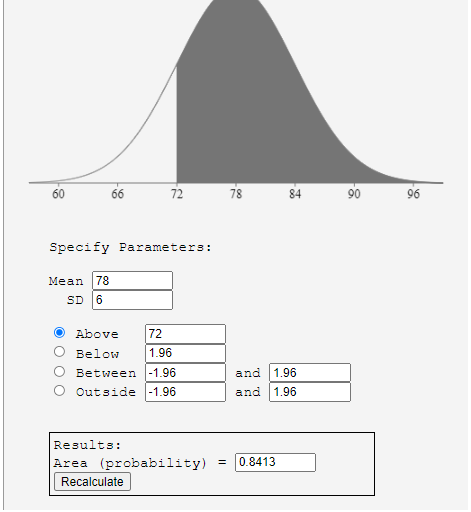

b. Suppose that students scoring in the top 10% of this distribution are to receive an **A** grade.
What is the minimum score a student must achieve to earn an **A** grade?

In [6]:
# random variable dan olasılığa giderken cdf, olasılıkdan random variable gitmek için ise ppf kullanılır.
# % 10 giderken 
q = 1 - 0.1

In [7]:
stats.norm.ppf(q, loc = mu, scale = sigma)

85.6893093932676

c. What must be the cutoff point for passing the examination if the examiner wants only the
top 28.1% of all scores to be passing?

In [8]:
q = 1 - 0.281

In [9]:
stats.norm.ppf(q, loc = mu, scale = sigma)

81.47924035456623

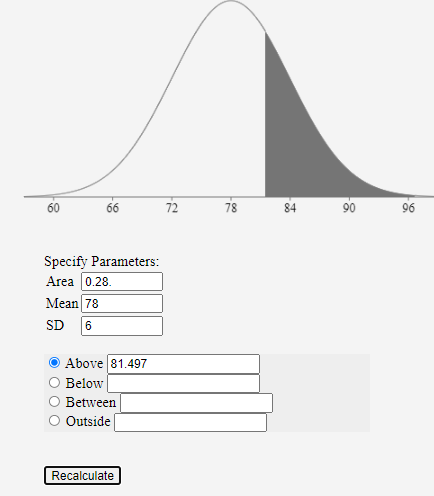

d. Approximately what proportion of students have scores 5 or more points above the score
that cuts off the lowest 25%?

In [11]:
# Burada olasılıktan random variable gideceğiz. ilk olarak  en alttaki % 25 denk gelen notu buluyorum.
# Burada bulduğum nota 5 ilave edip çıkan nottan yüksek alanların olasılığını hesaplamak için bunuda 
# 1 den çıkarıyorum.
q1 = 0.25
x1 = stats.norm.ppf(q1, loc = mu, scale = sigma)
x1

73.95306149882352

In [12]:
1-stats.norm.cdf(x1+5, mu, sigma)

0.43689605516226615

*OPTIONAL*

f. If it is known that a student’s score exceeds 72, what is the probability that his or her score
exceeds 84? 

## t Distribution
*Lane, D. (2006). Online statistics education: a multimedia course of study (http://onlinestatbook.com/). Rice University.*

For a t distribution with 15 degrees of freedom, 90% of the distribution is within how many standard deviations of the mean?

In [17]:
# t dağılımı sorulduğunda ilk sormamız gerekn serbestlik derecesi olmalıdır. 
# 30 dan küçük sampler da t dağılımı kullanmamız gerekir.

dof = 15
q = 0.95   # asağıdaki şekilde olduğu gibi t öncesi % 95 denk geliyor.

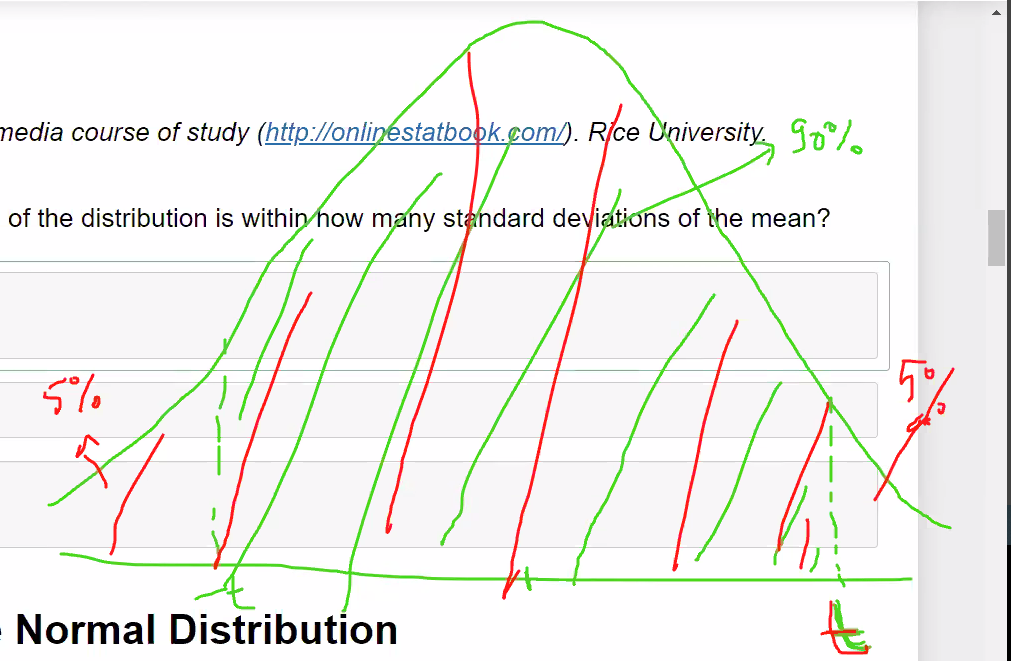

In [18]:
stats.t.ppf(q, dof)

1.7530503556925547

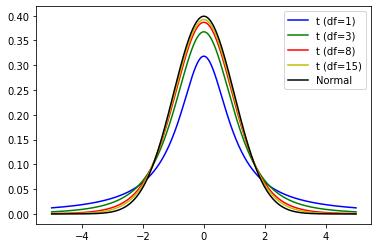

In [24]:
plt.figure(figsize=(6,4))
xs = np.linspace(-5,5,1000)

plt.plot(xs, stats.t.pdf(xs,1), "b", label="t (df=1)")  # serbestlik derecesi 1 olan 
plt.plot(xs, stats.t.pdf(xs,3), "g", label="t (df=3)")  # serbestlik derecesi 3 olan
plt.plot(xs, stats.t.pdf(xs,8), "r", label="t (df=8)")  # serbestlik derecesi 8 olan
plt.plot(xs, stats.t.pdf(xs,15), "y", label="t (df=15)")  # serbestlik derecesi 15 olan
plt.plot(xs, stats.norm.pdf(xs), "k", label="Normal")  # Normal Dist.
# küçük sample larda t dist kullanıyoruz. 

plt.legend()
plt.show()

## Confidence Intervals Using the Normal Distribution

If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.

In [25]:
import seaborn as sns

In [26]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

1. Load "tips" dataset from Seaborn library

In [28]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


2. Draw a set of vertical bar plots (based on "total_bill") grouped by "day" variable:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

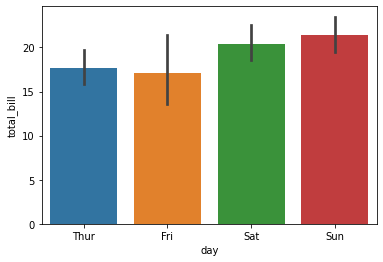

In [29]:
sns.barplot(x= "day", y="total_bill", data=tips, ci=95)

3. Subset a dataframe just including Sunday tips

In [32]:
tipsSun = tips[tips.day=="Sun"]
tipsSun.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


4. Calculate mean and std

In [34]:
tipsSun["total_bill"].mean()

21.410000000000004

In [35]:
tipsSun["total_bill"].std()

8.832121828869889

5. Calculate standart error of the mean

In [37]:
sem = tipsSun["total_bill"].std()/np.sqrt(len(tipsSun))
sem

1.0131138555021968

6. Calculate the margin of error (95%)

In [38]:
z = stats.norm.ppf(0.975)  # % 95 olasılık -t ile t arasındaki değerdir. 
                           # t ye kadad olan kısım ise 0.975 tir.
z

1.959963984540054

In [39]:
moe = z*sem

In [40]:
moe

1.9856666690228222

7. Calculate the upper confidence limit

In [42]:
tipsSun["total_bill"].mean() + moe

23.395666669022827

8. Calculate the lower confidence limit

In [43]:
tipsSun["total_bill"].mean() - moe

19.42433333097718

9. Calculate 95% Confidence Interval around the mean by using scipy.stats

In [44]:
stats.norm.interval(0.95, loc = tipsSun["total_bill"].mean(), scale = tipsSun["total_bill"].std()/np.sqrt(len(tipsSun)))

# buna göre bizim sunday günü % 95 ihtimalle bu aralıkta bill öderiz.

(19.42433333097718, 23.395666669022827)

### Exercise 8.7 (Large Samples)
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

- The shopping times of n = 64 randomly selected customers at a local supermarket were recorded. 

- The average and variance of the 64 shopping times were 33 $minutes$ and 256 $minutes^2$, respectively. 

- Estimate μ, the true average shopping time per customer, with a confidence coefficient of 1 − α = .90.

In [45]:
n = 64
xbar = 33
var = 256
ci = 0.90
s = np.sqrt(var)

sem = s/np.sqrt(n)

In [47]:
sem

2.0

In [48]:
stats.norm.interval(0.90, loc = xbar, scale = sem) # 90 ihtimalle bu aralıktayız.

(29.710292746097053, 36.28970725390295)

#### Proof

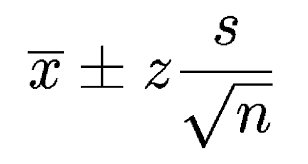

In [49]:
# burada z*s/kök n bize margin of error değerini verir.

# büyük sample için z, küçük sample için t dist kullanıyoruz.

# % 90 için z yi hesaplamak için -z 0 z gibi düşünürüz. yani 0,95 alırız. Burada olasılıktan random variable gidersek.

z = stats.norm.ppf(0.95)
z

1.6448536269514722

In [50]:
moe = z * sem
moe

3.2897072539029444

In [53]:
low_limit = xbar + moe
low_limit

36.28970725390295

In [54]:
high_limit = xbar - moe
high_limit

29.710292746097057

### Exercise 8.11 (Small Samples)
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

A manufacturer of gunpowder has developed a new powder, which was tested in eight shells. The resulting muzzle velocities, in feet per second, were as follows:

3005 2925 2935 2965

2995 3005 2937 2905

Find a 95% confidence interval for the true average velocity μ for shells of this type. Assume that muzzle velocities are approximately normally distributed.

In [55]:
x = [3005, 2925, 2935, 2965, 2995, 3005, 2937, 2905]

In [57]:
# küçük sample ile uğraşırken ve population std bilmiyorsak t dağılımını kullanırız.
# 8 sample varsa bunun serbestlik derecesi n-1=7 olarak bulunur.

# Sample size
n = 8

# Sample mean
xbar = np.mean(x)

# Sample standard deviation
s = np.std(x, ddof = 1)  # sadece x yazarsak populasyon std sini, ddof = 1 yazarsak sample std sini alırız.

# Confidence level
cl = 0.95   

In [58]:
s

39.08964057138413

In [59]:
stats.t.interval(0.95, df = n-1, loc = xbar, scale= s/np.sqrt(n))

(2926.3202426713874, 2991.6797573286126)

#### Proof

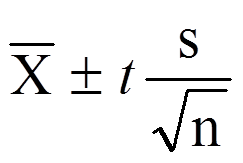

In [60]:
t = stats.t.ppf(0.975, df=n-1)     # t dağılımına göre t değeri yine -t 0 t ise t için 0.975 olarak hesaplıyoruz.
t

2.3646242510102993

In [61]:
sem = s/np.sqrt(n)
sem

13.820274961085254

In [62]:
moe = t * sem
moe

32.67975732861261

In [65]:
low_limit = xbar - moe
low_limit

2926.3202426713874

In [66]:
high_limit = xbar + moe
high_limit

2991.6797573286126